In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import  mean_squared_error, r2_score

import statsmodels.api as sm

In [154]:
cal = pd.read_csv('calendar.csv.gz')
listd = pd.read_csv('listings.csv.gz')
lists = pd.read_csv('listings.csv')
revs = pd.read_csv('reviews.csv.gz')
nhood = pd.read_csv('neighbourhoods.csv')

In [155]:
# pd.set_option('display.max_colu?mns', 96)
pd.set_option('display.max_rows', 96)

In [156]:
# Convert to Booleans
listd['host_is_superhost'] = listd.apply(lambda x:  x.host_is_superhost=='t', axis= 1)
listd['host_has_profile_pic'] = listd.apply(lambda x:  x.host_has_profile_pic=='t', axis= 1)
listd['host_identity_verified'] = listd.apply(lambda x:  x.host_identity_verified=='t', axis= 1)
listd['instant_bookable'] = listd.apply(lambda x:  x.instant_bookable=='t', axis= 1)

In [157]:
print(cal.date.min(),cal.date.max())
print(revs.date.min(),revs.date.max())
# print(lists.last_review.min(),lists.last_review.max())

2018-07-05 2019-07-04
2009-05-03 2018-07-05


In [158]:
# tmp=listd.copy() # Create a new copy of the existing dataframe otherwise it is only by reference
# tmp.head().T

In [159]:
def price_xform(dframe,colname):
    dframe[colname]=dframe[colname].str.replace('$','')
    dframe[colname]=dframe[colname].str.replace(',','')
    dframe[colname]=pd.to_numeric(dframe[colname])
#     return(dframe)

In [160]:
#Transform all the price columns

price_xform(listd,'price')
price_xform(listd,'weekly_price')
price_xform(listd,'monthly_price')
price_xform(listd,'security_deposit')
price_xform(listd,'cleaning_fee')
price_xform(listd,'extra_people')

# List Transformation1

listd.price = listd.price.str.replace('$','')
listd.price = listd.price.str.replace(',','')

listd.weekly_price = listd.weekly_price.str.replace('$','')
listd.weekly_price = listd.weekly_price.str.replace(',','')

listd.monthly_price = listd.monthly_price.str.replace('$','')
listd.monthly_price = listd.monthly_price.str.replace(',','')

listd.security_deposit = listd.security_deposit.str.replace('$','')
listd.security_deposit = listd.security_deposit.str.replace(',','')

listd.cleaning_fee = listd.cleaning_fee.str.replace('$','')
listd.cleaning_fee = listd.cleaning_fee.str.replace(',','')

listd.extra_people = listd.extra_people.str.replace('$','')
listd.extra_people = listd.extra_people.str.replace(',','')

# List Transformation2

listd.price = pd.to_numeric(listd.price)
listd.weekly_price = pd.to_numeric(listd.weekly_price)
listd.monthly_price = pd.to_numeric(listd.monthly_price)
listd.security_deposit = pd.to_numeric(listd.security_deposit)
listd.cleaning_fee = pd.to_numeric(listd.cleaning_fee)
listd.extra_people = pd.to_numeric(listd.extra_people)

# Not Working ???   ==> AttributeError: 'NoneType' object has no attribute 'head'

def impute_nullrows(dframe,colname):
    dframe[~dframe[colname].isnull()]   # remove nulls from one column

impute_nullrows(listd,'zipcode')

In [161]:
#Impute the Data
listd=listd[~listd['zipcode'].isnull()]   # remove nulls from one column

In [162]:
listd.head().T

,0,1,2,3,4
id,958,5858,7918,8014,8142
listing_url,https://www.airbnb.com/rooms/958,https://www.airbnb.com/rooms/5858,https://www.airbnb.com/rooms/7918,https://www.airbnb.com/rooms/8014,https://www.airbnb.com/rooms/8142
scrape_id,20180705131954,20180705131954,20180705131954,20180705131954,20180705131954
last_scraped,2018-07-05,2018-07-05,2018-07-05,2018-07-05,2018-07-05
name,"Bright, Modern Garden Unit - 1BR/1B",Creative Sanctuary,A Friendly Room - UCSF/USF - San Francisco,Newly Remodeled room in big house WIFI market,Friendly Room Apt. Style -UCSF/USF - San Franc...
summary,Our bright garden unit overlooks a grassy back...,NaN,Nice and good public transportation. 7 minute...,Freshly painted newly done laminate floor with...,Nice and good public transportation. 7 minute...
space,"Newly remodeled, modern, and bright garden uni...",We live in a large Victorian house on a quiet ...,Room rental-sunny view room/sink/Wi Fi (inner ...,The room is recently painted in the color of c...,Room rental Sunny view Rm/Wi-Fi/TV/sink/large ...
description,Our bright garden unit overlooks a grassy back...,We live in a large Victorian house on a quiet ...,Nice and good public transportation. 7 minute...,Freshly painted newly done laminate floor with...,Nice and good public transportation. 7 minute...
experiences_offered,none,none,none,none,none
neighborhood_overview,*Quiet cul de sac in friendly neighborhood *St...,I love how our neighborhood feels quiet but is...,"Shopping old town, restaurants, McDonald, Whol...","The neighborhood is very residential, close to...",NaN


In [163]:
# #list the rows that meet the required condition
# list[list['cleaning_fee'].isnull()]
# list[list['cleaning_fee']==700]

In [164]:
dfcorr=listd.corr()
# dfcorr.price.sort_values()

In [165]:
dfcorr.head()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month
id,1.000000e+00,4.261146e-14,NaN,NaN,NaN,5.320980e-01,NaN,-1.624946e-01,1.185969e-01,1.185969e-01,...,2.373790e-02,9.122580e-03,4.526615e-02,-2.440778e-02,-2.884769e-02,2.976721e-02,8.188586e-02,2.377363e-01,1.565688e-01,1.960954e-01
scrape_id,4.261146e-14,1.000000e+00,NaN,NaN,NaN,-1.849895e-15,NaN,5.801427e-15,-8.822073e-15,-8.822073e-15,...,2.391677e-15,4.551033e-16,4.156126e-16,2.181325e-15,-1.942836e-15,-1.468005e-15,-2.793297e-15,-2.211879e-14,2.856163e-15,-3.079829e-15
thumbnail_url,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
medium_url,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xl_picture_url,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
dfcorr.price.sort_values()

reviews_per_month                -1.959225e-01
number_of_reviews                -1.532426e-01
calculated_host_listings_count   -9.049283e-02
host_listings_count              -4.348399e-02
host_total_listings_count        -4.348399e-02
host_id                          -3.656741e-02
id                               -1.416493e-02
availability_365                 -9.812047e-03
minimum_nights                   -8.270795e-03
maximum_nights                   -8.127144e-04
scrape_id                         9.328169e-16
review_scores_value               7.851718e-03
zipcode                           1.549825e-02
longitude                         1.610928e-02
review_scores_checkin             3.208644e-02
availability_90                   3.212850e-02
availability_60                   6.383961e-02
review_scores_communication       6.503470e-02
availability_30                   7.384580e-02
review_scores_accuracy            8.174402e-02
extra_people                      9.057201e-02
review_scores

In [166]:
lreg_cols_master = ['square_feet','weekly_price','cleaning_fee','accommodates','bedrooms','beds','bathrooms','guests_included','zipcode']
lreg_cols = ['price','weekly_price','cleaning_fee','accommodates','bedrooms','beds','bathrooms','guests_included','zipcode']

In [167]:
dflreg = listd[lreg_cols]
# dflreg['const']=1
dflreg = sm.add_constant(dflreg)
# dflreg.shape

In [168]:
dflreg=pd.get_dummies(data=dflreg, columns=['zipcode'])  # create dummies and drop the parent column
dflreg.drop(columns=[dflreg.columns[-1]],inplace=True)  #dropped the last column from the add dummies

In [169]:
#modify contents
#df.loc[df['First Season'] > 1990, 'First Season'] = 1


dflreg['cleaning_fee'].fillna(0, inplace=True)
dflreg['beds'].fillna(0, inplace=True)
dflreg['bathrooms'].fillna(0, inplace=True)

In [170]:
dfscatter=dflreg.loc[:,'price':'guests_included']
dfscatter.head()

,price,weekly_price,cleaning_fee,accommodates,bedrooms,beds,bathrooms,guests_included
0,170.0,1120.0,100.0,3,1,2.0,1.0,2
1,235.0,1600.0,100.0,5,2,3.0,1.0,2
2,65.0,485.0,50.0,2,1,1.0,4.0,1
3,63.0,370.0,30.0,1,1,1.0,2.0,1
4,65.0,490.0,50.0,2,1,1.0,4.0,1


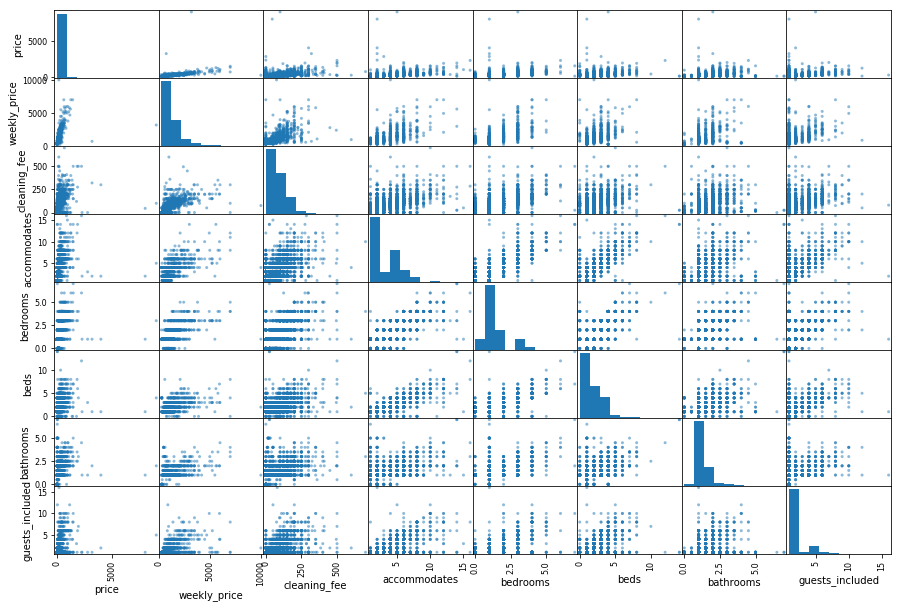

In [171]:
pd.plotting.scatter_matrix(dfscatter,figsize=(15,10));

In [172]:
y=dflreg.price
X=dflreg.drop(['price','weekly_price'],axis=1)

In [173]:
X_chunk, X_test, y_chunk, y_test = train_test_split(X, y, test_size=0.20, random_state=47)
X_train, X_vald, y_train, y_vald = train_test_split(X_chunk, y_chunk, test_size=0.20, random_state=47)

In [222]:
X_train = X_chunk.copy()
y_train = y_chunk.copy()

In [223]:
print(X_train.shape, X_vald.shape, X_test.shape)
print(y_train.shape, y_vald.shape, y_test.shape)

(3735, 35) (747, 35) (934, 35)
(3735,) (747,) (934,)


In [224]:
lmodel = linear_model.LinearRegression()
lmodel.fit(X_train,y_train)
y_predsk = lmodel.predict(X_test)

In [225]:
print('Coefficients: \n', lmodel.coef_)

Coefficients: 
 [-7.09993383e-13  6.84288072e-01  2.52819264e+01  4.84733429e+01
 -1.16463965e+01  4.84299480e+01  2.63798114e+00 -3.80952441e+01
  2.48964816e+01  8.78810458e+01  6.74888266e+01  3.92323036e+02
  9.12108818e+01  3.54047573e+01  1.39017130e+02  1.01054860e+02
  1.45119611e+01  3.17442041e+01 -2.72085166e+01  5.37693470e+01
  7.55393990e+01  4.18122128e+01  3.67505523e+01  1.13046410e+01
  5.44454117e+01 -1.49435126e+01  1.05408757e+02 -3.74362911e+01
 -4.32991353e+00  3.15750386e+01  3.04031650e+01 -4.54630946e+01
  1.44102866e+02 -3.75069403e+01  5.49895870e+01]


In [226]:
y_predsk.shape

(934,)

In [227]:
from sklearn.utils import check_array
import numpy as np
def mse_prop(y_true, y_pred): 


    return (np.mean(np.abs((y_true - y_pred)**2 / (y_true+1)**2  )) * 100) **0.5



In [228]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_predsk))
print("Variance squared error: %.2f" % r2_score(y_test, y_predsk))

print("MSE Proportion: %.2f" % mse_prop(y_test, y_predsk))

Mean squared error: 15645.83
Variance squared error: 0.53
MSE Proportion: 32.84


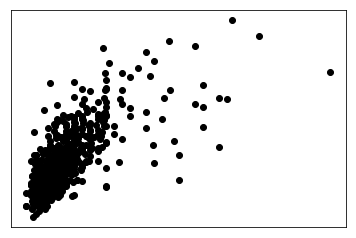

In [229]:
# Plot outputs
plt.scatter(y_test, y_predsk,  color='black')
#plt.plot(y_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [230]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     35.43
Date:                Thu, 02 Aug 2018   Prob (F-statistic):          5.94e-198
Time:                        18:41:17   Log-Likelihood:                -25843.
No. Observations:                3735   AIC:                         5.176e+04
Df Residuals:                    3700   BIC:                         5.197e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -72.4088    246.006     

491.6375369727108


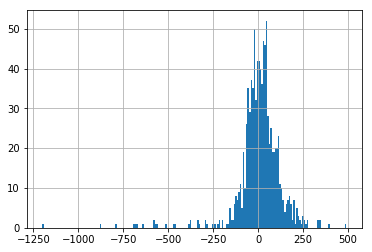

In [235]:
y_resdsk=(y_predsk-y_test)
print(y_resdsk.max())
y_resdsk.hist(bins =200)

8949.435578646888


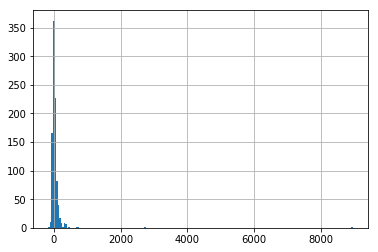

In [236]:
y_resdpct=(y_predsk-y_test)*100/(y_test+1)
print(y_resdpct.max())
y_resdpct.hist(bins =200)

In [182]:
dflreg.describe()

,const,price,weekly_price,cleaning_fee,accommodates,bedrooms,beds,bathrooms,guests_included,zipcode_94014.0,...,zipcode_94122.0,zipcode_94123.0,zipcode_94124.0,zipcode_94127.0,zipcode_94129.0,zipcode_94131.0,zipcode_94132.0,zipcode_94133.0,zipcode_94134.0,zipcode_94158.0
count,4669.0,4669.000000,1023.000000,4669.000000,4669.000000,4669.000000,4669.000000,4669.000000,4669.000000,4669.000000,...,4669.000000,4669.000000,4669.000000,4669.000000,4669.000000,4669.000000,4669.000000,4669.000000,4669.000000,4669.000000
mean,1.0,217.754337,1308.061584,78.177982,3.339473,1.390019,1.828015,1.285821,1.833583,0.006425,...,0.048190,0.028272,0.021418,0.020133,0.000214,0.047548,0.010281,0.033626,0.016492,0.002570
std,0.0,264.990406,970.752304,67.459155,1.995117,0.940698,1.226746,0.626862,1.440307,0.079909,...,0.214191,0.165765,0.144788,0.140470,0.014635,0.212830,0.100881,0.180284,0.127371,0.050637
min,1.0,0.000000,250.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,100.000000,750.000000,30.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,155.000000,1000.000000,65.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,250.000000,1500.000000,100.000000,4.000000,2.000000,2.000000,1.500000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.0,9000.000000,9999.000000,700.000000,16.000000,7.000000,14.000000,7.000000,16.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<function matplotlib.pyplot.plot(*args, **kwargs)>

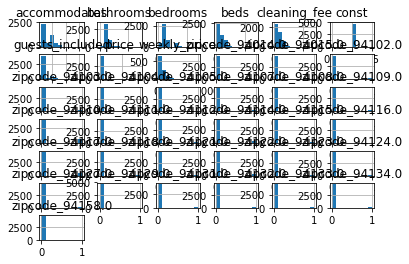

In [245]:
plt_cols = dflreg.columns
ax = dflreg[plt_cols].hist(bins=10)
plt.plot();

In [ ]:
dflreg['price'][dflreg['price']<500].hist(bins=20);

In [ ]:
dflreg['price'][[dflreg['price']>500 and dflreg['price']<2000]].hist(bins=20);

In [ ]:
pd.crosstab(dflreg['bedrooms'], dflreg['beds'])

In [246]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import accuracy_score, mean_squared_error
from collections import Counter

In [221]:
class RandomForest(object):
    '''A Random Forest class'''

    def __init__(self, num_trees, num_features):
        '''
           num_trees:  number of trees to create in the forest:
        num_features:  the number of features to consider when choosing the
                           best split for each node of the decision trees
        '''
        self.num_trees = num_trees
        self.num_features = num_features
        self.forest = None

    def fit(self, X, y):
        '''
        X:  two dimensional numpy array representing feature matrix
                for test data
        y:  numpy array representing labels for test data
        '''
        self.forest = self.build_forest(X, y, self.num_trees, X.shape[0], \
                                        self.num_features)

    def build_forest(self, X, y, num_trees, num_samples, num_features):
        '''
        Return a list of num_trees DecisionTrees.
        '''
        forest = []
        for i in range(num_trees):
            sample_indices = np.random.choice(X.shape[0], num_samples, \
                                              replace=True)
            sample_X = np.array(X[sample_indices])
            sample_y = np.array(y[sample_indices])
            dt = DecisionTree(num_features=self.num_features)
            dt.fit(sample_X, sample_y)
            forest.append(dt)
        return forest

    def predict(self, X):
        '''
        Return a numpy array of the labels predicted for the given test data.
        '''
        answers = np.array([tree.predict(X) for tree in self.forest]).T
        return np.array([Counter(row).most_common(1)[0][0] for row in answers])

    def score(self, X, y):
        '''
        Return the accuracy of the Random Forest for the given test data and
        labels.
        '''
        return (self.predict(X) == y).mean()

In [247]:
from sklearn.model_selection import train_test_split

# df = pd.read_csv('./data/congressional_voting.csv', names=['Party']+list(range(1, 17)))
# y = df.pop('Party').values
# X = df.values
#X_train, X_test, y_train, y_test = train_test_split(X, y)

rf = RandomForest(num_trees=10, num_features=10)
rf.fit(X_train, y_train)
print("Random Forest score:", rf.score(X_test, y_test))

KeyError: '[ 376   22 2753 ... 2047 2040 3440] not in index'

In [ ]:
myrfreg = 
myrfreg.fit(X, y)